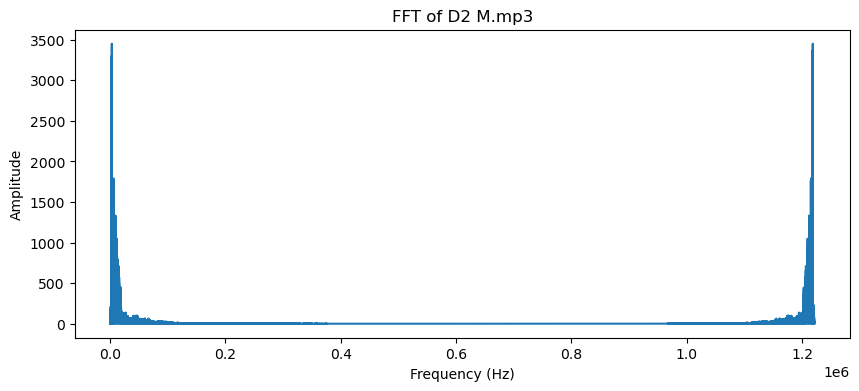

In [1]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Set the folder path containing your audio files
audio_folder = 'D:\Data sets'

# List of audio file names
audio_files = ['D2 M.mp3']

# Initialize dictionaries to store audio data, sampling rates, and features
audio_data = {}
sampling_rates = {}
audio_features = {}
for file in audio_files:
    audio_path = os.path.join(audio_folder, file)
    audio, sample_rate = librosa.load(audio_path, sr=None)
    audio_data[file] = audio
    sampling_rates[file] = sample_rate
    
    from IPython.display import Audio

# Play a sample audio (e.g., the first file)
Audio(audio_data['D2 M.mp3'], rate=sampling_rates['D2 M.mp3'])
for file in audio_files:
    # Extract audio features using Librosa
    mfccs = librosa.feature.mfcc(y=audio_data[file], sr=sampling_rates[file])
    audio_features[file] = {'mfccs': mfccs, 'sample_rate': sampling_rates[file]}
# Perform FFT on the audio data
for file in audio_files:
    audio_fft = np.fft.fft(audio_data[file])
    audio_features[file]['fft'] = audio_fft
    # Plot the FFT of the audio files
for file in audio_files:
    plt.figure(figsize=(10, 4))
    plt.title(f'FFT of {file}')
    plt.plot(np.abs(audio_features[file]['fft']))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.show()
